In [23]:
import numpy as np
from scipy.optimize import minimize, LinearConstraint
import ad

In [24]:
def f(x):
    x1 = x[0]
    x2 = x[1]
    return x1 * x1 + x2 * x2

def g(x):
    x1 = x[0]
    x2 = x[1]
    return x1 + x2 - 2

In [25]:
import matplotlib.pyplot as plt
from matplotlib import cm

def plot(trajectory, title):
    min_x, max_x = -5, 5
    min_y, max_y = -5, 5

    n_points = 250

    x = np.linspace(min_x, max_x, n_points)
    y = np.linspace(min_y, max_y, n_points)
    x, y = np.meshgrid(x, y)
    z = f([x, y])
    
    fig, ax = plt.subplots(figsize=(18, 15))
    ax.set_xlim((min_x, max_x))
    ax.set_ylim((min_y, max_y))
    ax.set_title(title)

    c = ax.pcolormesh(x, y, z, cmap=cm.coolwarm)
    fig.colorbar(c, ax=ax)

    line_x = np.linspace(min_x, max_y, n_points)
    line_y = 2 - line_x

    ax.plot(line_x, line_y, 'g-')

    ax.plot(*list(zip(*trajectory)), 'k-o')

    x_min = trajectory[-1]

    end_point_plot = ax.plot(*x_min, 'r*', zorder=2)
    end_point_plot[0].set_markersize(15)
    text_offset = 0.15
    for i, x in enumerate(trajectory):
        text_x = x + text_offset
        ax.text(*text_x, str(i), size=12, zorder=3, color='k') 

In [26]:
x0 = np.array([-4, -1.5])
f_grad, f_hess = ad.gh(f)

| niter |f evals|CG iter|  obj func   |tr radius |   opt    |  c viol  | penalty  |CG stop|
|-------|-------|-------|-------------|----------|----------|----------|----------|-------|
|   1   |   1   |   0   | +1.8250e+01 | 1.00e+00 | 2.50e+00 | 7.50e+00 | 1.00e+00 |   0   |
|   2   |   2   |   1   | +1.0906e+01 | 7.00e+00 | 1.65e+00 | 6.37e+00 | 1.00e+00 |   2   |
|   3   |   3   |   2   | +2.0000e+00 | 3.26e+01 | 1.33e-15 | 1.33e-15 | 1.00e+00 |   1   |

`gtol` termination condition is satisfied.
Number of iterations: 3, function evaluations: 3, CG iterations: 2, optimality: 1.33e-15, constraint violation: 1.33e-15, execution time: 0.0096 s.
res.x=array([1., 1.])
trajectory=[array([-4. , -1.5]), array([-3.01005051, -1.35857864]), array([1., 1.])]


<ipython-input-25-87e831394ea4>:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = ax.pcolormesh(x, y, z, cmap=cm.coolwarm)


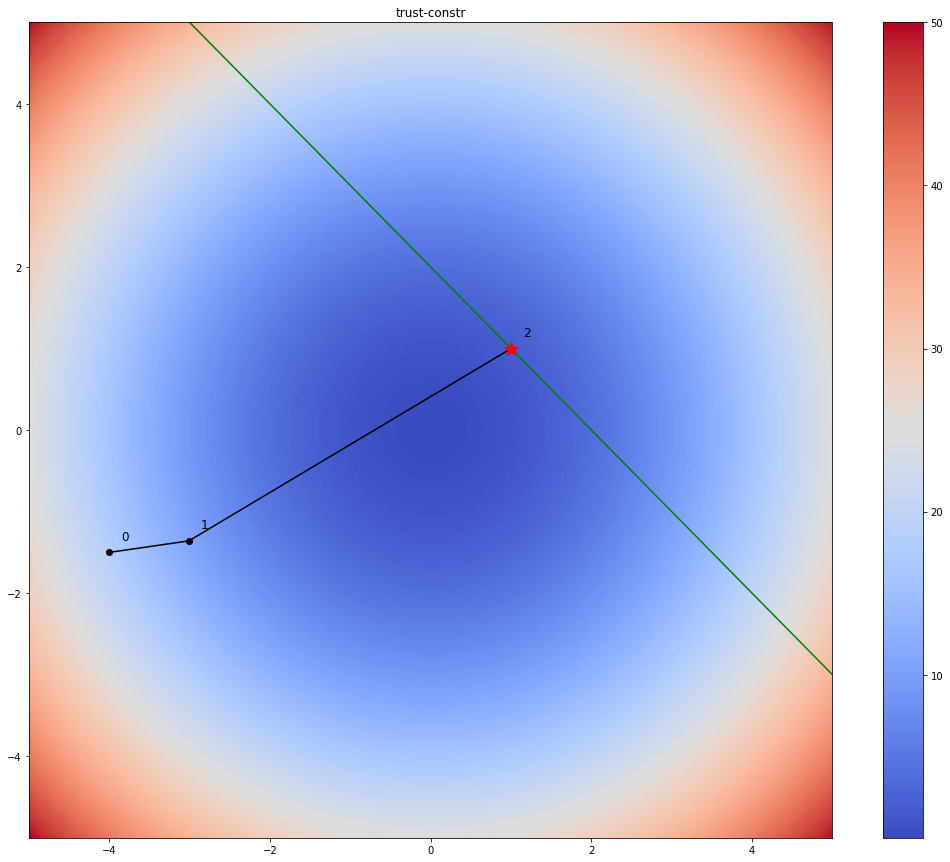

In [27]:
linear_constraint = LinearConstraint([1, 1], [2], [2])
trajectory=[]
method = 'trust-constr'
res = minimize(f, x0, method=method, jac=f_grad, hess=f_hess, 
    constraints=linear_constraint, options={'verbose': 3}, 
    callback=lambda x, _: trajectory.append(x))

print(f'{res.x=}')
print(f'{trajectory=}')
plot(trajectory, method)

In [28]:
g_grad, _ = ad.gh(g)
equality_constraint = {
    'type': 'eq',
    'fun': g,
    'jac': g_grad
}

Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.0
            Iterations: 4
            Function evaluations: 4
            Gradient evaluations: 4
res.x=array([1., 1.])
trajectory=[array([-4. , -1.5]), array([ 2.25, -0.25]), array([0.33823529, 1.66176471]), array([1., 1.]), array([1., 1.])]


<ipython-input-25-87e831394ea4>:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = ax.pcolormesh(x, y, z, cmap=cm.coolwarm)


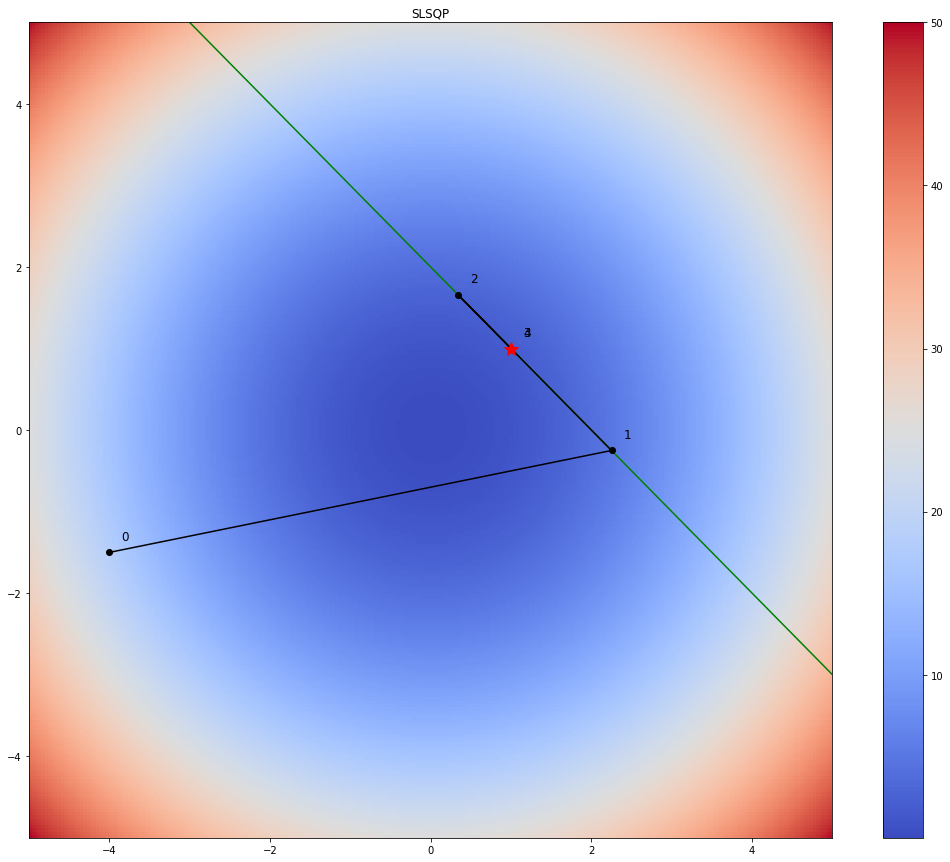

In [29]:
trajectory=[x0]
method = 'SLSQP'
res = minimize(f, x0, method=method, jac=f_grad,
    constraints=equality_constraint, 
    options={'ftol': 1e-9, 'disp': True},
    callback=lambda x: trajectory.append(x))
print(f'{res.x=}')
print(f'{trajectory=}')
plot(trajectory, method)

res.x=array([1.00009144, 0.99990856])
trajectory=[array([-4. , -1.5]), array([-3. , -1.5]), array([-3. , -0.5]), array([-2.29289322,  0.20710678]), array([-1.58578644,  0.91421356]), array([-0.87867966,  1.62132034]), array([-1.93933983,  1.26776695]), array([0.07366941, 1.92633059]), array([-0.52512627,  1.97487373]), array([0.25044611, 1.74955389]), array([0.4272228, 1.5727772]), array([0.6039995, 1.3960005]), array([0.7807762, 1.2192238]), array([0.95755289, 1.04244711]), array([1.13432959, 0.86567041]), array([1.04594124, 1.13083546]), array([1.13432959, 0.86567041]), array([1.04594124, 0.95405876]), array([0.91335872, 1.08664128]), array([0.97964998, 1.02035002]), array([1.00174706, 0.99825294]), array([1.02384415, 0.97615585]), array([0.99069852, 0.98720439]), array([0.97964998, 1.02035002]), array([0.99069852, 1.00930148]), array([1.00727134, 0.99272866]), array([0.99898493, 1.00101507]), array([0.99760386, 0.999634  ]), array([0.99622279, 1.00377721]), array([0.99760386, 1.0023

<ipython-input-25-87e831394ea4>:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = ax.pcolormesh(x, y, z, cmap=cm.coolwarm)


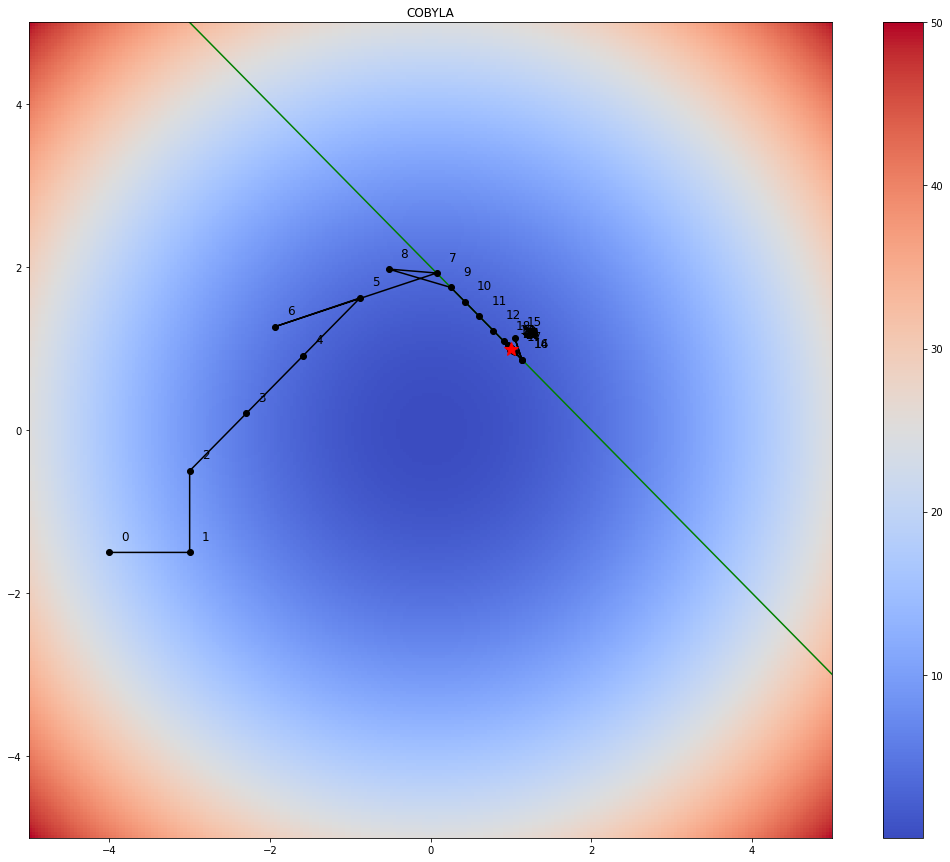

In [30]:
equality_constraint = {
    'type': 'ineq',
    'fun': lambda x: np.array([
        x[0] + x[1] - 2,
        -x[0] - x[1] + 2
    ])
}

trajectory=[]
def f_with_trajectory_saving(x):
    trajectory.append(x.copy())
    return f(x)

method = 'COBYLA'
res = minimize(f_with_trajectory_saving, x0, method=method,
    constraints=equality_constraint, 
    options={'disp': True, 'catol': 1e-8})
print(f'{res.x=}')
print(f'{trajectory=}')
plot(trajectory, method)